## Example 9.2 Mixed Flow Reactor 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# parameters of the reactor, Example 9.1
U = 100 # m/hr
L = 100 # m
Ac = 10 # m^2
c0 = 1 # mg/L
k = 2 # hr^-1
x = np.linspace(0,L)

# Plug flow ractor
c_PFR = c0 * np.exp(-k/U*x)

Q = U*Ac
V = Ac*L
# CSTR
c_CSTR = (c0 * Q/(Q+k*V)) * np.ones(len(x))

In [16]:
# MFR
E = np.array([2000,10000])

def MFR(E):
    eta = k*E/U**2
    lamb1 = U/(2*E)*(1+np.sqrt(1+4*eta))
    lamb2 = U/(2*E)*(1-np.sqrt(1+4*eta))
    F = U*c0*lamb2*np.exp(lamb2*L)/((U-E*lamb1)*lamb2*np.exp(lamb2*L)-(U-E*lamb2)*lamb1*np.exp(lamb1*L))
    G = U*c0*lamb1*np.exp(lamb1*L)/((U-E*lamb2)*lamb1*np.exp(lamb1*L)-(U-E*lamb1)*lamb2*np.exp(lamb2*L))
    c = F*np.exp(lamb1*x) + G*np.exp(lamb2*x)
    return c

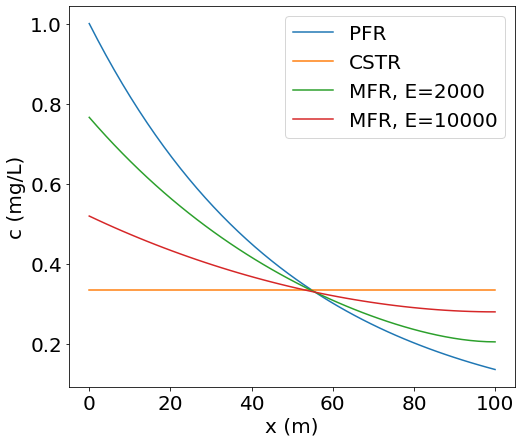

In [22]:
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rc('axes', labelsize=20) 
matplotlib.rc('legend', fontsize=20) 

plt.figure(figsize=(8,7))
plt.plot(x,c_PFR,label='PFR')
plt.plot(x,c_CSTR,label='CSTR')
for Ei in E:
    c_MFR = MFR(Ei)
    plt.plot(x,c_MFR,label='MFR, E='+str(Ei))
plt.xlabel('x (m)')
plt.ylabel('c (mg/L)')
plt.legend()